In [1]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv('Covid Data.csv')
#showing our initial dataframe here
dataframe

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [2]:
## Question 1
unmodified = dataframe.copy()

df = pd.read_excel('data_dictionary.xlsx')
dictionary = df.set_index('variable').T.to_dict()

for key, value in dictionary.items():
    for i in value.values():
        res = dict(item.split("=") for item in i.split(", "))
        dictionary[key] = res

dictionary = {outer_k.upper(): {inner_k.replace(' ', ''): inner_v for inner_k, inner_v in outer_v.items()} for outer_k, outer_v in dictionary.items()}

for key, value in dictionary.items():
    dataframe[key]= dataframe[key].astype(str)
    dataframe.replace({key: dictionary[key]}, inplace=True)
    
dataframe

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,Female,NO,03/05/2020,UNKNOWN,YES,65,NO,NO,...,NO,NO,YES,NO,NO,NO,NO,NO,3,UNKNOWN
1,2,1,Male,NO,03/06/2020,UNKNOWN,YES,72,UNKNOWN,NO,...,NO,NO,YES,NO,NO,YES,YES,NO,5,UNKNOWN
2,2,1,Male,YES,09/06/2020,YES,NO,55,UNKNOWN,YES,...,NO,NO,NO,NO,NO,NO,NO,NO,3,NO
3,2,1,Female,NO,12/06/2020,UNKNOWN,NO,53,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,7,UNKNOWN
4,2,1,Male,NO,21/06/2020,UNKNOWN,NO,68,UNKNOWN,YES,...,NO,NO,YES,NO,NO,NO,NO,NO,3,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,Male,NO,9999-99-99,UNKNOWN,NO,40,UNKNOWN,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,7,UNKNOWN
1048571,1,13,Male,YES,9999-99-99,NO,NO,51,UNKNOWN,NO,...,NO,NO,YES,NO,NO,NO,NO,NO,7,NO
1048572,2,13,Male,NO,9999-99-99,UNKNOWN,NO,55,UNKNOWN,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,7,UNKNOWN
1048573,2,13,Male,NO,9999-99-99,UNKNOWN,NO,28,UNKNOWN,NO,...,NO,NO,NO,NO,NO,NO,NO,NO,7,UNKNOWN


In [3]:
dataframe['DEATH'] = np.where(dataframe['DATE_DIED'] == '9999-99-99', 'NO', 'YES')

In [4]:
#dataframe['DATE_DIED'] = dataframe['DATE_DIED'].str.replace('/','-')

In [5]:
dataframe.rename(columns = {'PATIENT_TYPE':'HOSPITALIZED', 'HIPERTENSION':'HYPERTENSION'}, inplace = True)

In [6]:
dataframe['CLASIFFICATION_FINAL'].values[dataframe['CLASIFFICATION_FINAL'].values > 3] = 0

In [7]:
#saving the q1 dataframe for displaying onto streamlit
pd.DataFrame.to_csv(dataframe, 'dataset.csv',index=False)

### Question 2

<AxesSubplot: ylabel='Frequency'>

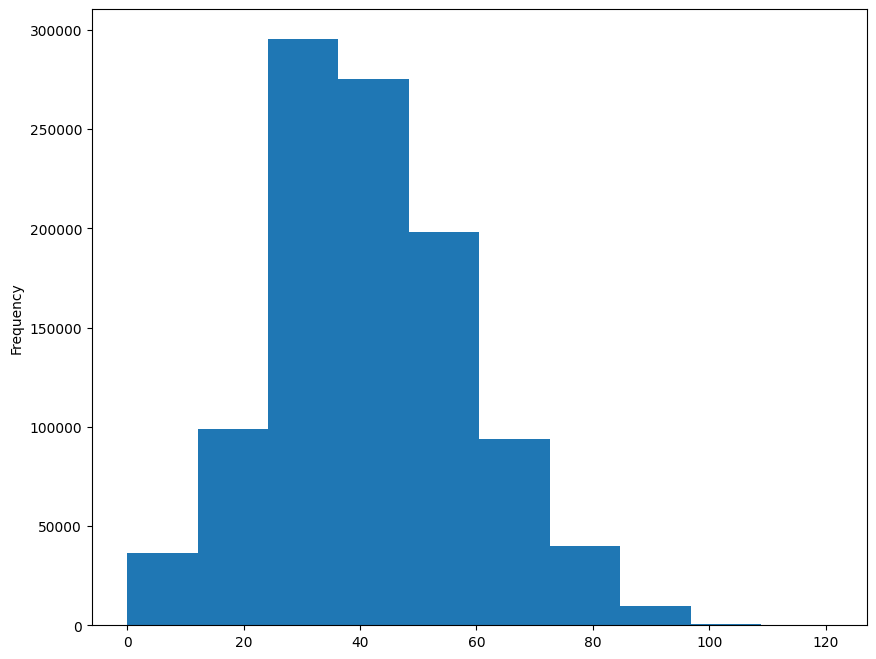

In [8]:
## Question 2
plt = dataframe["AGE"].plot(kind="hist", bins=10, figsize=(10,8))
plt

### Question 3

In [9]:
## Question 3
bins = [0,10,20,30,40,50,60,70,80,90,100]

group = dataframe.groupby(['SEX',pd.cut(dataframe.AGE, bins)])
group.size().unstack()
#

AGE,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]"
SEX,,,,,,,,,,
Female,12753,23662,106274,126269,111717,76717,37667,18866,7933,1387
Male,14754,22577,97305,120071,107859,80383,45519,23036,8631,1195


### Question 4

In [10]:
## Question 4
filter = dataframe['INTUBED'] == 'YES'
dataframe[filter].shape[0]

33656

### Question 5

In [11]:
## Question 5
diseases_and_ICU = list(['DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'ICU'])

In [12]:
corr_disease = unmodified[diseases_and_ICU].corr()
corr_disease

,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,ICU
DIABETES,1.000000,0.828823,0.829349,0.781108,0.835018,0.634611,-0.009223
COPD,0.828823,1.000000,0.908929,0.852273,0.855249,0.687323,-0.020146
ASTHMA,0.829349,0.908929,1.000000,0.868917,0.864264,0.696709,-0.023415
INMSUPR,0.781108,0.852273,0.868917,1.000000,0.825158,0.734826,-0.024077
HIPERTENSION,0.835018,0.855249,0.864264,0.825158,1.000000,0.671532,-0.007573
OTHER_DISEASE,0.634611,0.687323,0.696709,0.734826,0.671532,1.000000,-0.035330
ICU,-0.009223,-0.020146,-0.023415,-0.024077,-0.007573,-0.035330,1.000000


<AxesSubplot: >

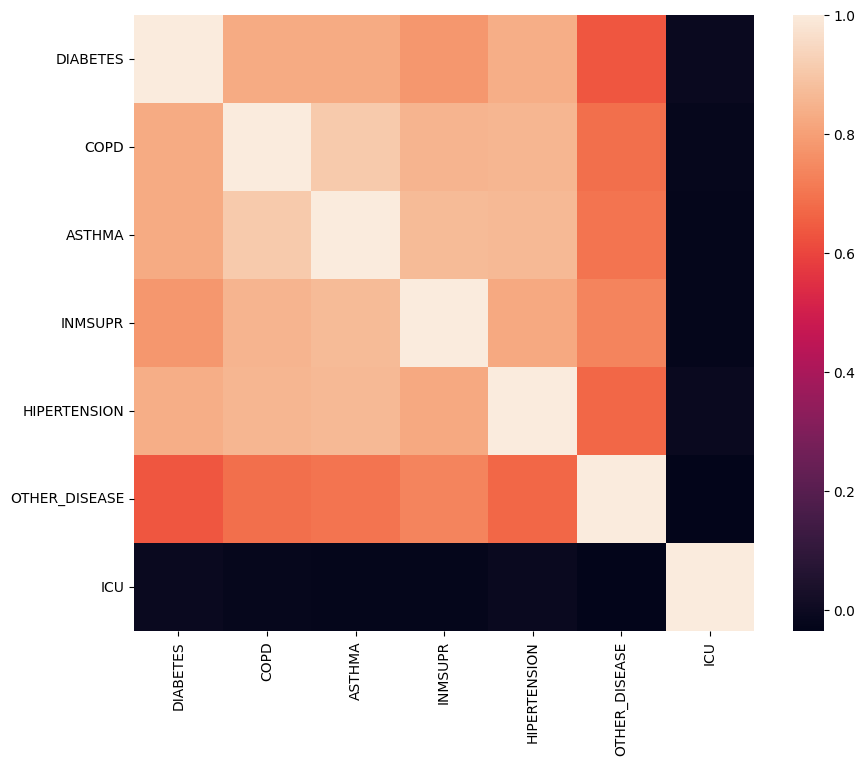

In [13]:
import seaborn as sns;
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(corr_disease)

### Question 6

In [14]:
## Question 6
filter = dataframe['DATE_DIED'].notnull()
dataframe.loc[filter, 'DIABETES':'OTHER_DISEASE'][dataframe == 'YES'].count().sort_values(ascending=False).idxmax()

'HYPERTENSION'

### Question 7

In [15]:
## Question 8
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFECV

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [16]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [17]:
df1 = pd.read_csv('dataset.csv')
df1

,USMER,MEDICAL_UNIT,SEX,HOSPITALIZED,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,Female,NO,03/05/2020,UNKNOWN,YES,65,NO,NO,...,NO,YES,NO,NO,NO,NO,NO,3,UNKNOWN,YES
1,2,1,Male,NO,03/06/2020,UNKNOWN,YES,72,UNKNOWN,NO,...,NO,YES,NO,NO,YES,YES,NO,0,UNKNOWN,YES
2,2,1,Male,YES,09/06/2020,YES,NO,55,UNKNOWN,YES,...,NO,NO,NO,NO,NO,NO,NO,3,NO,YES
3,2,1,Female,NO,12/06/2020,UNKNOWN,NO,53,NO,NO,...,NO,NO,NO,NO,NO,NO,NO,0,UNKNOWN,YES
4,2,1,Male,NO,21/06/2020,UNKNOWN,NO,68,UNKNOWN,YES,...,NO,YES,NO,NO,NO,NO,NO,3,UNKNOWN,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,Male,NO,9999-99-99,UNKNOWN,NO,40,UNKNOWN,NO,...,NO,NO,NO,NO,NO,NO,NO,0,UNKNOWN,NO
1048571,1,13,Male,YES,9999-99-99,NO,NO,51,UNKNOWN,NO,...,NO,YES,NO,NO,NO,NO,NO,0,NO,NO
1048572,2,13,Male,NO,9999-99-99,UNKNOWN,NO,55,UNKNOWN,NO,...,NO,NO,NO,NO,NO,NO,NO,0,UNKNOWN,NO
1048573,2,13,Male,NO,9999-99-99,UNKNOWN,NO,28,UNKNOWN,NO,...,NO,NO,NO,NO,NO,NO,NO,0,UNKNOWN,NO


In [18]:
df1.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                     object
HOSPITALIZED            object
DATE_DIED               object
INTUBED                 object
PNEUMONIA               object
AGE                      int64
PREGNANT                object
DIABETES                object
COPD                    object
ASTHMA                  object
INMSUPR                 object
HYPERTENSION            object
OTHER_DISEASE           object
CARDIOVASCULAR          object
OBESITY                 object
RENAL_CHRONIC           object
TOBACCO                 object
CLASIFFICATION_FINAL     int64
ICU                     object
DEATH                   object
dtype: object

In [19]:
df1['CLASIFFICATION_FINAL'].value_counts()

0    656596
3    381527
1      8601
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64

In [20]:
df1.shape

(1048575, 22)

In [21]:
df1.drop(['DATE_DIED'], axis=1, inplace=True)
df1.shape

(1048575, 21)

In [22]:
df1.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                     object
HOSPITALIZED            object
INTUBED                 object
PNEUMONIA               object
AGE                      int64
PREGNANT                object
DIABETES                object
COPD                    object
ASTHMA                  object
INMSUPR                 object
HYPERTENSION            object
OTHER_DISEASE           object
CARDIOVASCULAR          object
OBESITY                 object
RENAL_CHRONIC           object
TOBACCO                 object
CLASIFFICATION_FINAL     int64
ICU                     object
DEATH                   object
dtype: object

In [23]:
col_list = [col for col in df1.columns.tolist() if df1[col].dtype.name == "object"]
df_oh = df1[col_list]
df1 = df1.drop(col_list, 1)
df_oh = pd.get_dummies(df_oh)
df1 = pd.concat([df1, df_oh], axis=1)
df1.head()

,USMER,MEDICAL_UNIT,AGE,CLASIFFICATION_FINAL,SEX_ Female,SEX_ Male,HOSPITALIZED_ NO,HOSPITALIZED_YES,INTUBED_NO,INTUBED_UNKNOWN,...,RENAL_CHRONIC_UNKNOWN,RENAL_CHRONIC_YES,TOBACCO_NO,TOBACCO_UNKNOWN,TOBACCO_YES,ICU_NO,ICU_UNKNOWN,ICU_YES,DEATH_NO,DEATH_YES
0,2,1,65,3,1,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
1,2,1,72,0,0,1,1,0,0,1,...,0,1,1,0,0,0,1,0,0,1
2,2,1,55,3,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,2,1,53,0,1,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
4,2,1,68,3,0,1,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1


In [24]:
y = df1.CLASIFFICATION_FINAL
X = df1.drop("CLASIFFICATION_FINAL", 1)
colnames = X.columns
pd.DataFrame.to_csv(df1, 'cleaned.csv')

### Question 8

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [26]:
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5, n_estimators=100)
rf.fit(X, y)
rfe = RFECV(rf, min_features_to_select = 1, cv = 3, verbose=2)

In [27]:
rfe.fit(X, y)

Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 fe

RFECV(cv=3,
      estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                       n_jobs=-1),
      verbose=2)

In [28]:
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)

In [29]:
print('---------Top 20----------')
rfe_top20 = rfe_score.head(20)
display(rfe_top20)
pd.DataFrame.to_csv(rfe_top20, 'RFE_Top20.csv')

---------Top 20----------


,Features,Score
49,DEATH_NO,1.00
50,DEATH_YES,0.98
1,MEDICAL_UNIT,0.96
6,HOSPITALIZED_YES,0.94
47,ICU_UNKNOWN,0.92
5,HOSPITALIZED_ NO,0.90
8,INTUBED_UNKNOWN,0.88
2,AGE,0.86
46,ICU_NO,0.84
0,USMER,0.82


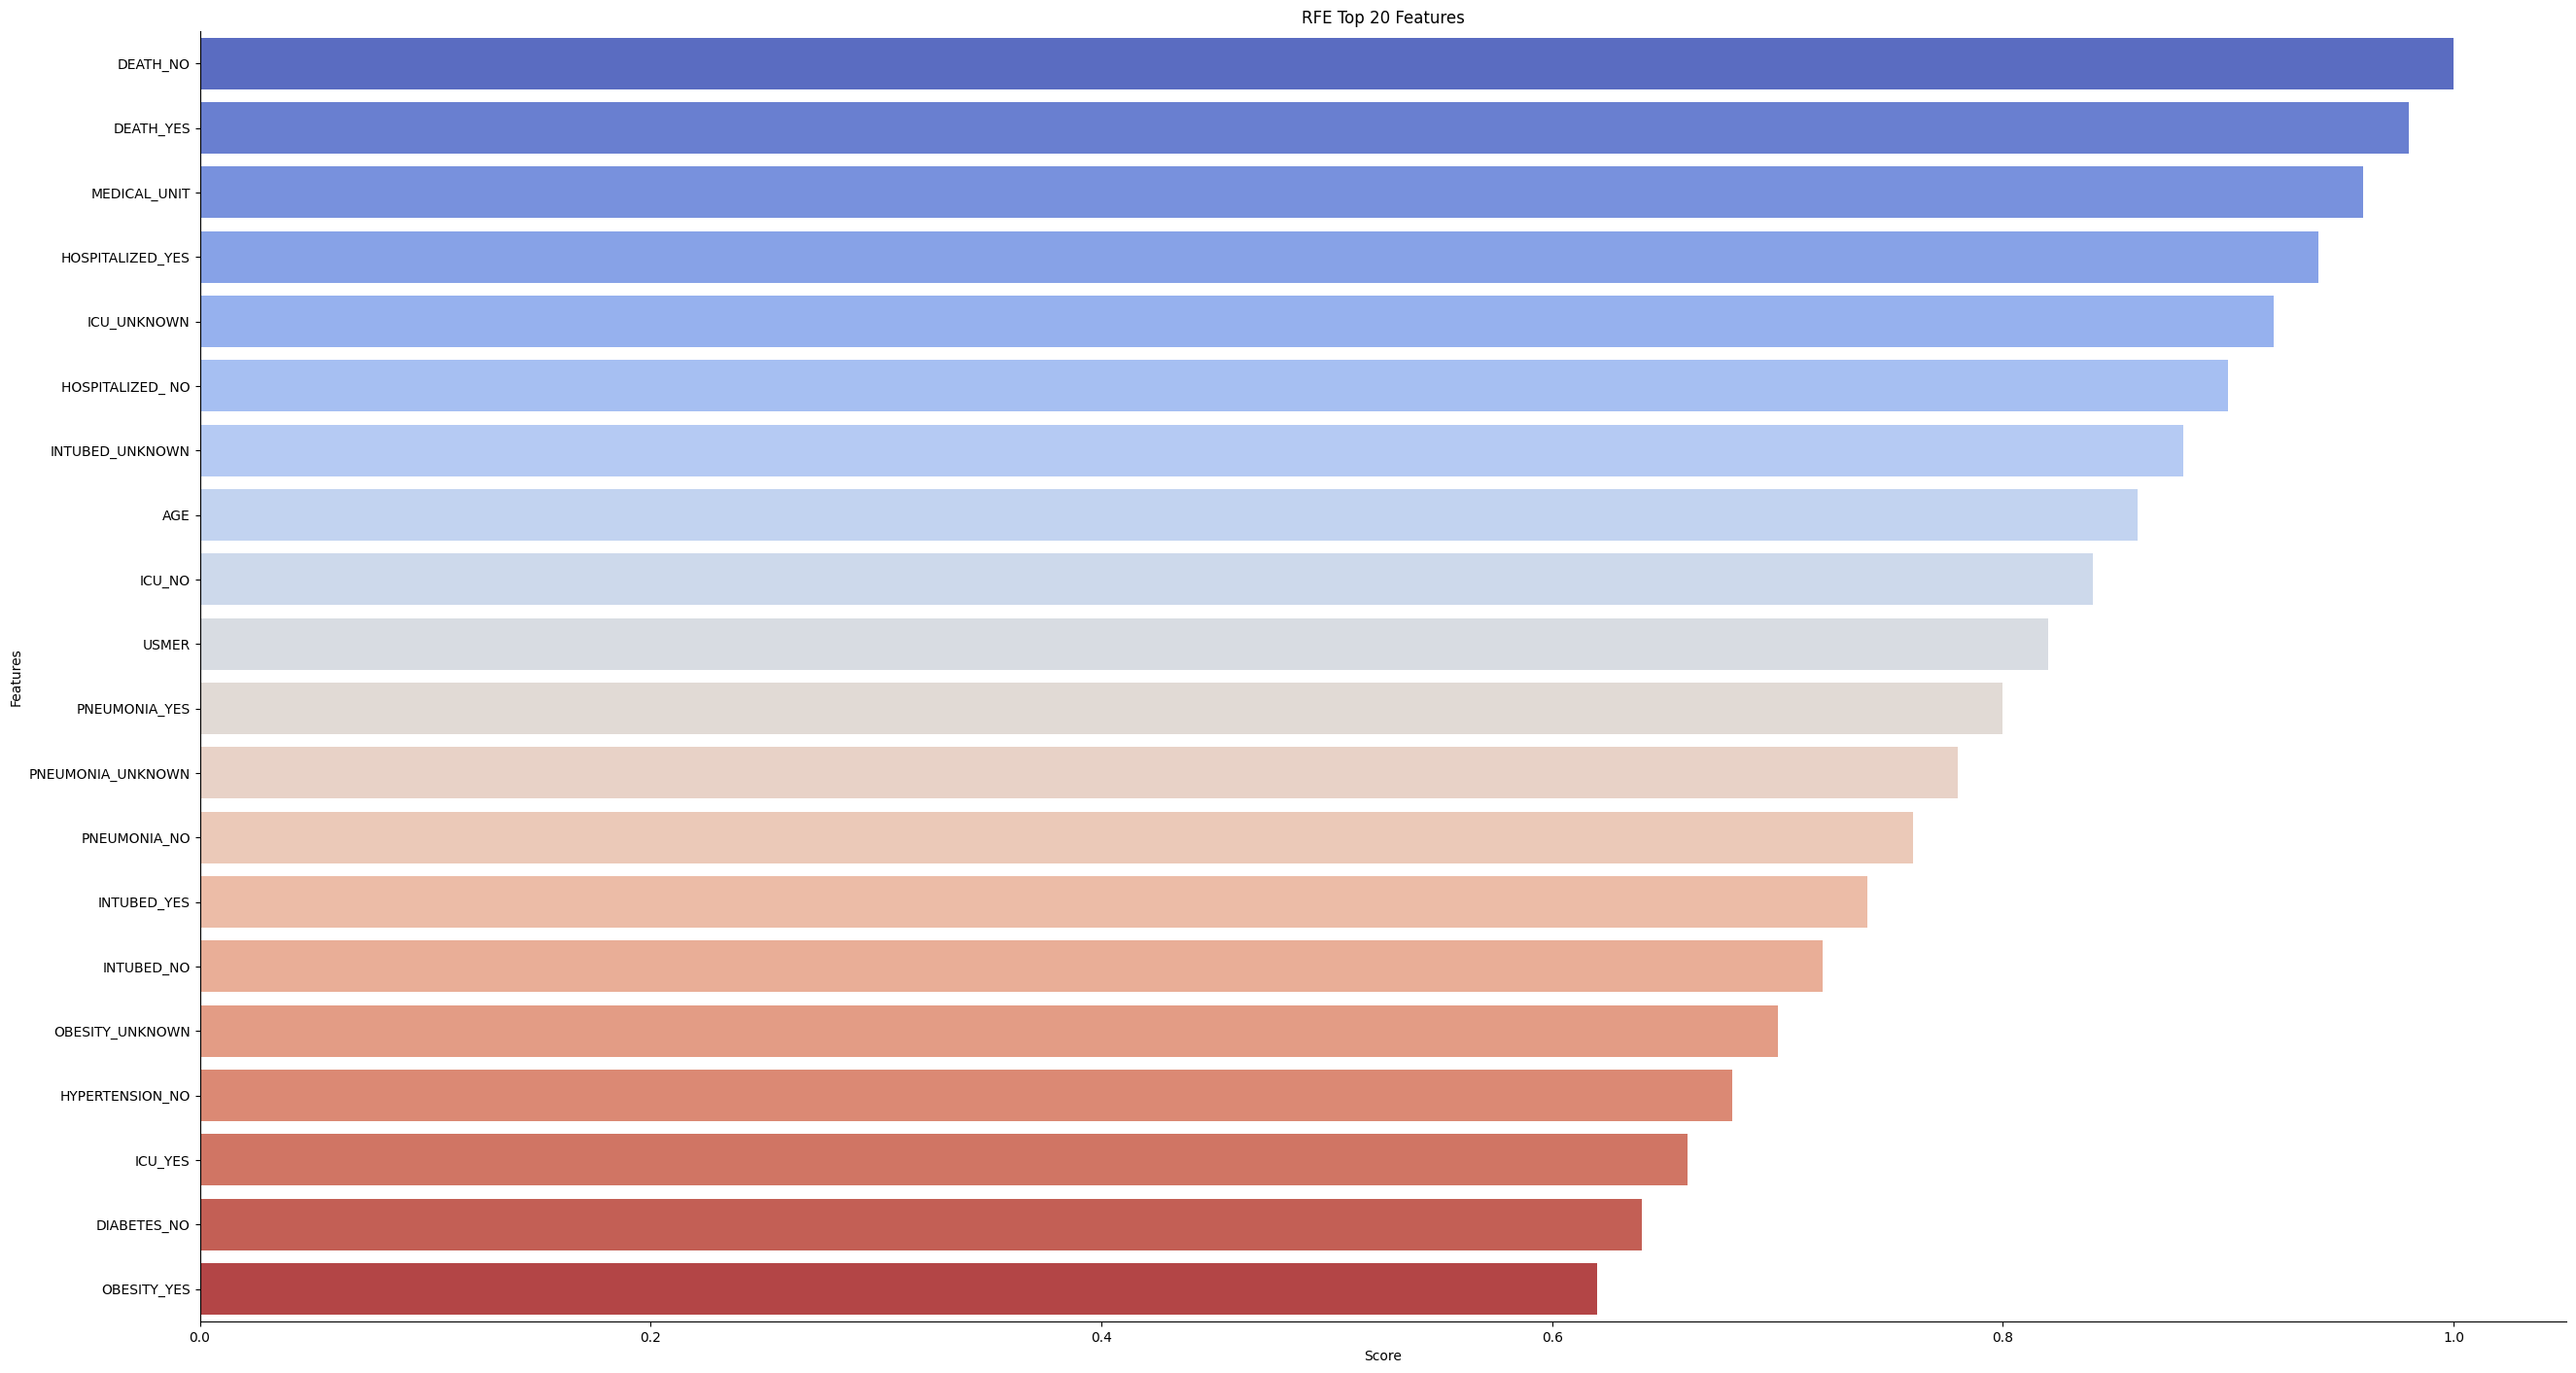

In [30]:
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[:20], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("RFE Top 20 Features")
sns_rfe_plot

### Question 10

In [91]:
## Question 10
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
nb = GaussianNB()
nb.fit(X_train[rfe_top20['Features']], y_train)
y_pred = nb.predict(X_test[rfe_top20['Features']])
# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(nb.score(X_train[rfe_top20['Features']], y_train)))
print("Accuracy on test set: {:.3f}".format(nb.score(X_test[rfe_top20['Features']], y_test)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)
    
prob_NB = nb.predict_proba(X_test[rfe_top20['Features']])
#prob_NB = prob_NB[:, 1]

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=nb.predict(X_test[rfe_top20['Features']]))
print(sk_report)

Accuracy on training set: 0.599
Accuracy on test set: 0.600
Mjority classifier Confusion Matrix
 [[107829    348   3945  19302]
 [  1144      8    152    377]
 [     0      0    344     26]
 [ 49061    205   9355  17619]]
              precision    recall  f1-score   support

           0   0.682315  0.820467  0.745041    131424
           1   0.014260  0.004759  0.007136      1681
           2   0.024935  0.929730  0.048567       370
           3   0.472056  0.231099  0.310292     76240

    accuracy                       0.599862    209715
   macro avg   0.298391  0.496514  0.277759    209715
weighted avg   0.599362  0.599862  0.579848    209715



In [94]:
report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=nb.predict(X_test[rfe_top20['Features']]), 
    output_dict=True)
result = pd.DataFrame(report).transpose()
print(result)

              precision    recall  f1-score        support
0              0.682315  0.820467  0.745041  131424.000000
1              0.014260  0.004759  0.007136    1681.000000
2              0.024935  0.929730  0.048567     370.000000
3              0.472056  0.231099  0.310292   76240.000000
accuracy       0.599862  0.599862  0.599862       0.599862
macro avg      0.298391  0.496514  0.277759  209715.000000
weighted avg   0.599362  0.599862  0.579848  209715.000000


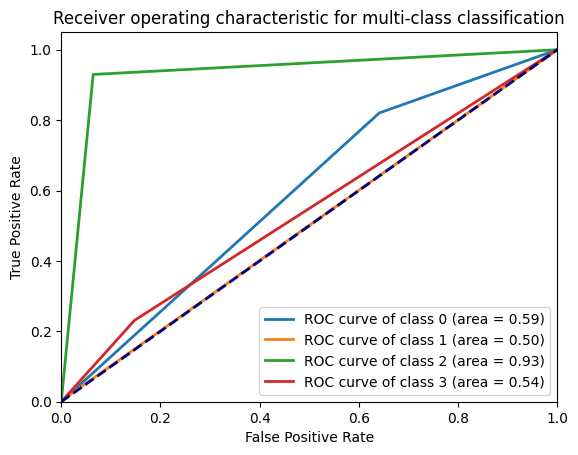

In [95]:
# Calculate the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_class = df1['CLASIFFICATION_FINAL'].nunique()
for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred == i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure()
lw = 2
for i in range(n_class):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

### Question 11

In [96]:
# Question 11
from sklearn.ensemble import RandomForestClassifier

In [97]:
rf = RandomForestClassifier(random_state=42, n_estimators=1000, max_depth=5)
rf.fit(X_train[rfe_top20['Features']], y_train)
y_pred = rf.predict(X_test[rfe_top20['Features']])

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(rf.score(X_train[rfe_top20['Features']], y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test[rfe_top20['Features']], y_test)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)
    
prob_RF = rf.predict_proba(X_test[rfe_top20['Features']])
#prob_RF = prob_RF[:, 1]

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=rf.predict(X_test[rfe_top20['Features']]))
print(sk_report)

Accuracy on training set: 0.663
Accuracy on test set: 0.664
Mjority classifier Confusion Matrix
 [[121431      0      0   9993]
 [  1384      0      0    297]
 [     1      0      0    369]
 [ 58481      0      0  17759]]
              precision    recall  f1-score   support

           0   0.669790  0.923964  0.776609    131424
           1   0.000000  0.000000  0.000000      1681
           2   0.000000  0.000000  0.000000       370
           3   0.624921  0.232935  0.339372     76240

    accuracy                       0.663710    209715
   macro avg   0.323678  0.289225  0.278995    209715
weighted avg   0.646928  0.663710  0.610060    209715



In [98]:
report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=rf.predict(X_test[rfe_top20['Features']]), 
    output_dict=True)
result = pd.DataFrame(report).transpose()
print(result)

              precision    recall  f1-score       support
0              0.669790  0.923964  0.776609  131424.00000
1              0.000000  0.000000  0.000000    1681.00000
2              0.000000  0.000000  0.000000     370.00000
3              0.624921  0.232935  0.339372   76240.00000
accuracy       0.663710  0.663710  0.663710       0.66371
macro avg      0.323678  0.289225  0.278995  209715.00000
weighted avg   0.646928  0.663710  0.610060  209715.00000


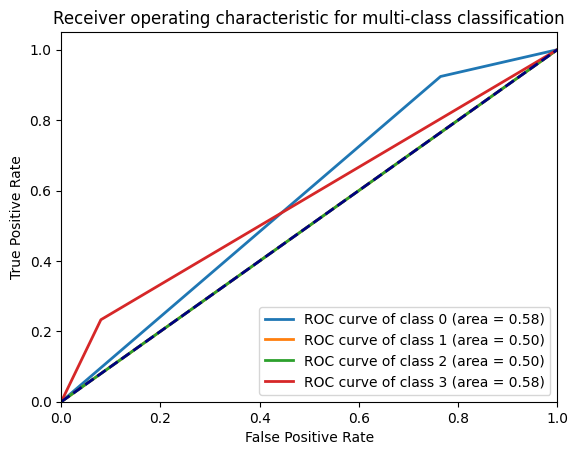

In [99]:
# Calculate the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_class = df1['CLASIFFICATION_FINAL'].nunique()
for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred == i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure()
lw = 2
for i in range(n_class):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

### Neural Network

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

from tensorflow.keras.utils import to_categorical
from iteration_utilities import deepflatten
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [58]:
sc = StandardScaler()
X_ss = sc.fit_transform(X[rfe_top20['Features']])
print(X_ss)

[[-3.55360697  3.55360697 -2.14342559 ... -0.12782704  0.37342774
  -0.42405103]
 [-3.55360697  3.55360697 -2.14342559 ... -0.12782704  0.37342774
   2.35820675]
 [-3.55360697  3.55360697 -2.14342559 ... -0.12782704 -2.67789424
  -0.42405103]
 ...
 [ 0.28140422 -0.28140422  1.07954257 ... -0.12782704  0.37342774
  -0.42405103]
 [ 0.28140422 -0.28140422  1.07954257 ... -0.12782704  0.37342774
  -0.42405103]
 [ 0.28140422 -0.28140422  1.07954257 ... -0.12782704  0.37342774
  -0.42405103]]


In [59]:
y_one_hot = to_categorical(y)

# Show the category label after one-hot encoding
print('Original label 0 : ', y[0])
print('After conversion to categorical ( one-hot ) : ', y_one_hot[0])

Original label 0 :  3
After conversion to categorical ( one-hot ) :  [0. 0. 0. 1.]


In [60]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 656596, 1: 8601, 2: 1851, 3: 381527}

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X_ss, y_one_hot, test_size = 0.1, shuffle= True)

In [66]:
model = Sequential()
model.add(Dense(128, input_dim=20, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(128, activation = "sigmoid"))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [67]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               2688      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 4)                 516       
                                                                 
Total params: 19,716
Trainable params: 19,716
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=200, batch_size=64, callbacks=[early_stopping])

Epoch 1/200
14746/14746 [==============================] - 38s 3ms/step - loss: 0.6772 - accuracy: 0.6596 - val_loss: 0.6673 - val_accuracy: 0.6643
Epoch 2/200
14746/14746 [==============================] - 38s 3ms/step - loss: 0.6701 - accuracy: 0.6625 - val_loss: 0.6665 - val_accuracy: 0.6638
Epoch 3/200
14746/14746 [==============================] - 38s 3ms/step - loss: 0.6680 - accuracy: 0.6631 - val_loss: 0.6659 - val_accuracy: 0.6646
Epoch 4/200
14746/14746 [==============================] - 37s 3ms/step - loss: 0.6671 - accuracy: 0.6634 - val_loss: 0.6632 - val_accuracy: 0.6647
Epoch 5/200
14746/14746 [==============================] - 38s 3ms/step - loss: 0.6665 - accuracy: 0.6636 - val_loss: 0.6630 - val_accuracy: 0.6665
Epoch 6/200
14746/14746 [==============================] - 38s 3ms/step - loss: 0.6660 - accuracy: 0.6637 - val_loss: 0.6632 - val_accuracy: 0.6661
Epoch 7/200
14746/14746 [==============================] - 41s 3ms/step - loss: 0.6658 - accuracy: 0.6637 - val_

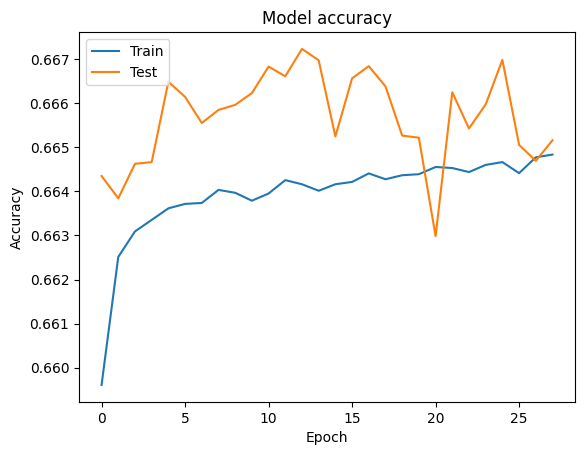

In [70]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

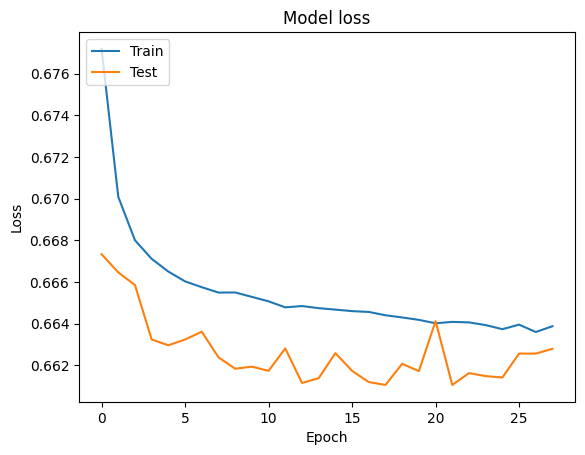

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()